In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,18.0,34.8,33.3,10.9,21.3,51.0,1.1,...,87.5,3.4,8.1,11.5,6.4,1.0,1.9,3.7,38.6,2023-24
2,2,Luka Doncic,DAL,20.0,35.9,31.9,11.0,22.5,48.8,3.9,...,76.6,0.7,7.7,8.4,8.7,1.3,0.5,3.9,33.4,2023-24
3,3,Kevin Durant,PHX,19.0,36.7,31.0,10.6,20.4,52.1,2.3,...,89.2,0.3,6.2,6.5,5.7,0.7,1.2,3.6,30.8,2023-24
4,4,De'Aaron Fox,SAC,15.0,36.5,30.5,10.7,22.5,47.8,3.0,...,73.4,1.1,3.6,4.7,6.5,1.5,0.3,2.3,27.3,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,258,Tristan Thompson,CLE,17.0,9.1,2.4,1.0,1.5,68.0,0.0,...,41.2,1.1,1.4,2.5,0.6,0.1,0.4,0.5,4.5,2023-24
259,259,Andre Jackson Jr.,MIL,17.0,7.7,2.0,0.8,1.3,63.6,0.4,...,0.0,0.6,0.6,1.2,0.6,0.3,0.0,0.5,3.2,2023-24
260,260,Cody Zeller,NOP,19.0,9.7,1.7,0.5,1.7,30.3,0.0,...,54.2,1.2,1.8,3.0,1.0,0.2,0.1,0.3,3.9,2023-24
261,261,P.J. Tucker,LAC,15.0,15.9,1.3,0.4,1.3,31.6,0.3,...,100.0,1.1,1.8,2.9,0.5,0.6,0.2,0.3,4.4,2023-24


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       263 non-null    object 
 1   PLAYER  262 non-null    object 
 2   TEAM    262 non-null    object 
 3   GP      262 non-null    float64
 4   MIN     262 non-null    float64
 5   PTS     262 non-null    float64
 6   FGM     262 non-null    float64
 7   FGA     262 non-null    float64
 8   FG%     262 non-null    float64
 9   3PM     262 non-null    float64
 10  3PA     262 non-null    float64
 11  3P%     262 non-null    float64
 12  FTM     262 non-null    float64
 13  FTA     262 non-null    float64
 14  FT%     262 non-null    float64
 15  OREB    262 non-null    float64
 16  DREB    262 non-null    float64
 17  REB     262 non-null    float64
 18  AST     262 non-null    float64
 19  STL     262 non-null    float64
 20  BLK     262 non-null    float64
 21  TOV     262 non-null    float64
 22  EF

# Data Cleaning

In [22]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [23]:
# Create a rearranged list 
arrange_columns = ['PLAYER', 'YEAR','TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,18.0,34.8,33.3,10.9,21.3,51.0,1.1,...,12.0,87.5,3.4,8.1,11.5,6.4,1.0,1.9,3.7,38.6
2,Luka Doncic,2023-24,DAL,20.0,35.9,31.9,11.0,22.5,48.8,3.9,...,7.9,76.6,0.7,7.7,8.4,8.7,1.3,0.5,3.9,33.4
3,Kevin Durant,2023-24,PHX,19.0,36.7,31.0,10.6,20.4,52.1,2.3,...,8.3,89.2,0.3,6.2,6.5,5.7,0.7,1.2,3.6,30.8
4,De'Aaron Fox,2023-24,SAC,15.0,36.5,30.5,10.7,22.5,47.8,3.0,...,8.3,73.4,1.1,3.6,4.7,6.5,1.5,0.3,2.3,27.3
5,Giannis Antetokounmpo,2023-24,MIL,21.0,34.6,30.5,11.8,19.1,61.4,0.4,...,10.0,65.7,2.7,7.9,10.6,5.0,1.4,1.3,4.0,34.1


In [24]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1 to 262
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  262 non-null    object 
 1   YEAR    262 non-null    object 
 2   TEAM    262 non-null    object 
 3   GP      262 non-null    float64
 4   MIN     262 non-null    float64
 5   PTS     262 non-null    float64
 6   FGM     262 non-null    float64
 7   FGA     262 non-null    float64
 8   FG%     262 non-null    float64
 9   3PM     262 non-null    float64
 10  3PA     262 non-null    float64
 11  3P%     262 non-null    float64
 12  FTM     262 non-null    float64
 13  FTA     262 non-null    float64
 14  FT%     262 non-null    float64
 15  OREB    262 non-null    float64
 16  DREB    262 non-null    float64
 17  REB     262 non-null    float64
 18  AST     262 non-null    float64
 19  STL     262 non-null    float64
 20  BLK     262 non-null    float64
 21  TOV     262 non-null    float64
 22  EF

# Visualization

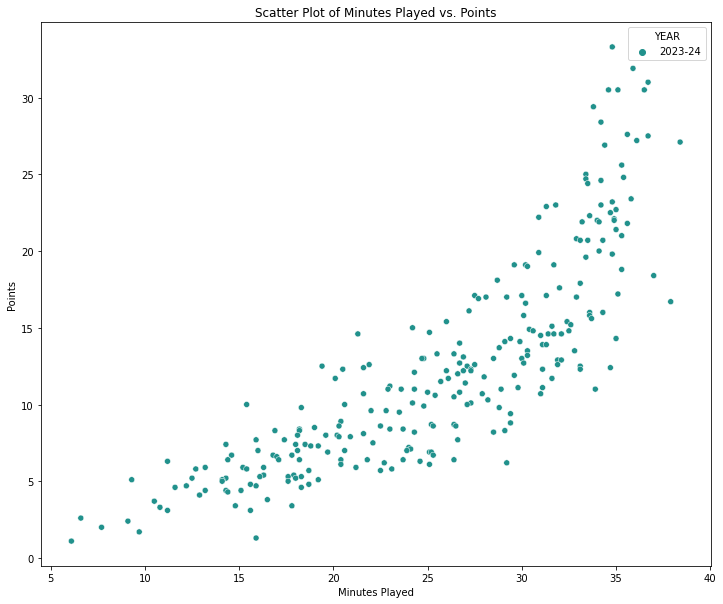

In [25]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [26]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
13,Tyrese Haliburton,2023-24,IND,18.0,34.4,26.9,9.4,17.9,52.5,3.9,...,4.8,88.4,0.7,3.4,4.2,12.1,1.0,0.7,2.2,33.6
11,Trae Young,2023-24,ATL,19.0,36.1,27.2,8.3,20.1,41.2,3.1,...,8.8,86.8,0.7,2.1,2.8,10.6,1.5,0.1,3.8,25.4
8,Nikola Jokic,2023-24,DEN,22.0,34.2,28.4,11.1,20.8,53.5,1.3,...,6.2,77.4,3.5,9.5,13.0,9.6,1.1,0.8,3.0,38.9
2,Luka Doncic,2023-24,DAL,20.0,35.9,31.9,11.0,22.5,48.8,3.9,...,7.9,76.6,0.7,7.7,8.4,8.7,1.3,0.5,3.9,33.4
14,Damian Lillard,2023-24,MIL,20.0,35.3,25.6,7.4,17.1,43.1,3.0,...,8.5,92.4,0.7,3.9,4.6,7.0,1.1,0.2,2.8,25.2
12,Tyrese Maxey,2023-24,PHI,20.0,38.4,27.1,9.4,20.1,46.5,3.3,...,5.8,89.6,0.6,3.7,4.3,6.7,0.9,0.7,1.4,26.9
15,LeBron James,2023-24,LAL,22.0,33.4,25.0,9.3,16.8,55.3,2.3,...,5.8,71.7,0.9,6.6,7.5,6.6,1.5,0.7,3.4,28.7
4,De'Aaron Fox,2023-24,SAC,15.0,36.5,30.5,10.7,22.5,47.8,3.0,...,8.3,73.4,1.1,3.6,4.7,6.5,1.5,0.3,2.3,27.3
1,Joel Embiid,2023-24,PHI,18.0,34.8,33.3,10.9,21.3,51.0,1.1,...,12.0,87.5,3.4,8.1,11.5,6.4,1.0,1.9,3.7,38.6
6,Shai Gilgeous-Alexander,2023-24,OKC,20.0,35.1,30.5,11.2,20.6,54.4,1.2,...,7.6,91.4,0.9,4.7,5.6,6.2,2.8,0.9,2.1,33.8


In [27]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] > 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
8,Nikola Jokic,2023-24,DEN,22.0,34.2,28.4,11.1,20.8,53.5,1.3,...,6.2,77.4,3.5,9.5,13.0,9.6,1.1,0.8,3.0,38.9
25,Anthony Davis,2023-24,LAL,22.0,35.0,22.7,8.5,16.0,53.3,0.1,...,6.7,83.7,3.6,9.0,12.7,3.2,1.0,2.7,2.0,31.9
1,Joel Embiid,2023-24,PHI,18.0,34.8,33.3,10.9,21.3,51.0,1.1,...,12.0,87.5,3.4,8.1,11.5,6.4,1.0,1.9,3.7,38.6
5,Giannis Antetokounmpo,2023-24,MIL,21.0,34.6,30.5,11.8,19.1,61.4,0.4,...,10.0,65.7,2.7,7.9,10.6,5.0,1.4,1.3,4.0,34.1
27,Bam Adebayo,2023-24,MIA,16.0,33.6,22.3,8.3,15.8,52.2,0.1,...,7.0,81.3,2.1,7.9,9.9,3.9,1.2,1.0,2.4,26.9
33,Karl-Anthony Towns,2023-24,MIN,21.0,33.2,21.9,7.9,15.5,50.9,2.1,...,4.3,90.1,1.1,7.8,9.0,3.1,0.9,0.7,3.0,24.5
10,Jayson Tatum,2023-24,BOS,21.0,36.7,27.5,9.6,19.4,49.6,3.0,...,6.6,79.0,0.7,8.0,8.7,4.2,1.1,0.3,3.2,27.5
2,Luka Doncic,2023-24,DAL,20.0,35.9,31.9,11.0,22.5,48.8,3.9,...,7.9,76.6,0.7,7.7,8.4,8.7,1.3,0.5,3.9,33.4
15,LeBron James,2023-24,LAL,22.0,33.4,25.0,9.3,16.8,55.3,2.3,...,5.8,71.7,0.9,6.6,7.5,6.6,1.5,0.7,3.4,28.7
3,Kevin Durant,2023-24,PHX,19.0,36.7,31.0,10.6,20.4,52.1,2.3,...,8.3,89.2,0.3,6.2,6.5,5.7,0.7,1.2,3.6,30.8


In [28]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,18.0,34.8,33.3,10.9,21.3,51.0,1.1,...,12.0,87.5,3.4,8.1,11.5,6.4,1.0,1.9,3.7,38.6
2,Luka Doncic,2023-24,DAL,20.0,35.9,31.9,11.0,22.5,48.8,3.9,...,7.9,76.6,0.7,7.7,8.4,8.7,1.3,0.5,3.9,33.4
3,Kevin Durant,2023-24,PHX,19.0,36.7,31.0,10.6,20.4,52.1,2.3,...,8.3,89.2,0.3,6.2,6.5,5.7,0.7,1.2,3.6,30.8
4,De'Aaron Fox,2023-24,SAC,15.0,36.5,30.5,10.7,22.5,47.8,3.0,...,8.3,73.4,1.1,3.6,4.7,6.5,1.5,0.3,2.3,27.3
5,Giannis Antetokounmpo,2023-24,MIL,21.0,34.6,30.5,11.8,19.1,61.4,0.4,...,10.0,65.7,2.7,7.9,10.6,5.0,1.4,1.3,4.0,34.1
6,Shai Gilgeous-Alexander,2023-24,OKC,20.0,35.1,30.5,11.2,20.6,54.4,1.2,...,7.6,91.4,0.9,4.7,5.6,6.2,2.8,0.9,2.1,33.8
7,Stephen Curry,2023-24,GSW,20.0,33.8,29.4,9.0,18.8,47.6,5.1,...,6.9,93.4,0.7,4.4,5.1,4.4,0.7,0.2,3.6,25.9
8,Nikola Jokic,2023-24,DEN,22.0,34.2,28.4,11.1,20.8,53.5,1.3,...,6.2,77.4,3.5,9.5,13.0,9.6,1.1,0.8,3.0,38.9
9,Donovan Mitchell,2023-24,CLE,17.0,35.6,27.6,9.5,20.9,45.5,3.0,...,6.4,87.0,1.1,4.8,5.9,5.3,1.9,0.4,2.8,26.1
10,Jayson Tatum,2023-24,BOS,21.0,36.7,27.5,9.6,19.4,49.6,3.0,...,6.6,79.0,0.7,8.0,8.7,4.2,1.1,0.3,3.2,27.5


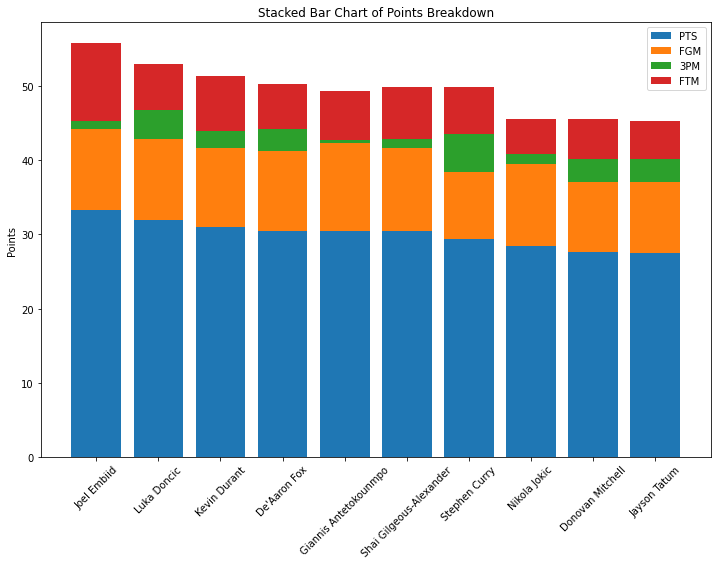

In [29]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [30]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [31]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
8              Nikola Jokic  2023-24  34.2  28.4  13.0
1               Joel Embiid  2023-24  34.8  33.3  11.5
5     Giannis Antetokounmpo  2023-24  34.6  30.5  10.6
10             Jayson Tatum  2023-24  36.7  27.5   8.7
2               Luka Doncic  2023-24  35.9  31.9   8.4
3              Kevin Durant  2023-24  36.7  31.0   6.5
9          Donovan Mitchell  2023-24  35.6  27.6   5.9
6   Shai Gilgeous-Alexander  2023-24  35.1  30.5   5.6
7             Stephen Curry  2023-24  33.8  29.4   5.1
4              De'Aaron Fox  2023-24  36.5  30.5   4.7


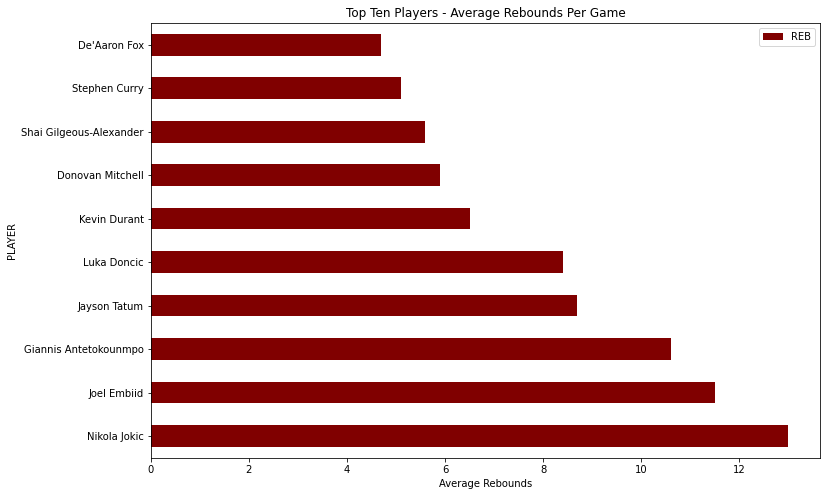

In [32]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

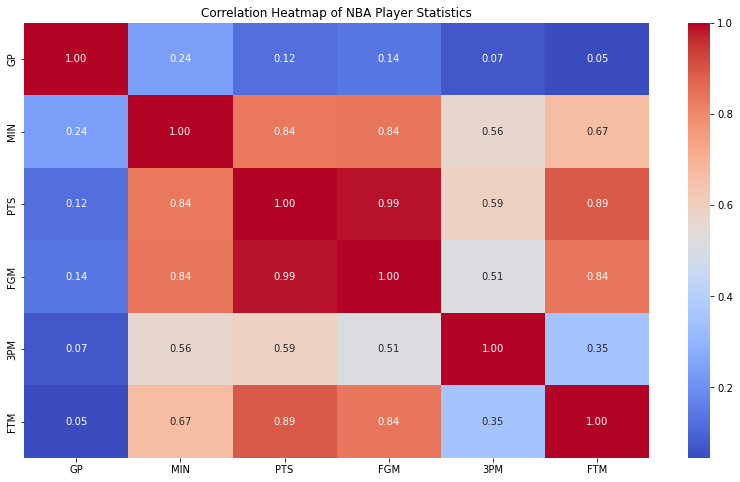

In [33]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', '3PM', 'FTM']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of NBA Player Statistics')
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1 to 262
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  262 non-null    object 
 1   YEAR    262 non-null    object 
 2   TEAM    262 non-null    object 
 3   GP      262 non-null    float64
 4   MIN     262 non-null    float64
 5   PTS     262 non-null    float64
 6   FGM     262 non-null    float64
 7   FGA     262 non-null    float64
 8   FG%     262 non-null    float64
 9   3PM     262 non-null    float64
 10  3PA     262 non-null    float64
 11  3P%     262 non-null    float64
 12  FTM     262 non-null    float64
 13  FTA     262 non-null    float64
 14  FT%     262 non-null    float64
 15  OREB    262 non-null    float64
 16  DREB    262 non-null    float64
 17  REB     262 non-null    float64
 18  AST     262 non-null    float64
 19  STL     262 non-null    float64
 20  BLK     262 non-null    float64
 21  TOV     262 non-null    float64
 22  EF

In [35]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)